## Task-2 --> Performing EDA in the Titanic Dataset 

In [49]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from scipy import stats

from sklearn.preprocessing import *
from sklearn.model_selection import *

In [50]:
df=pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
df.shape

(418, 12)

In [52]:
df.size

5016

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [54]:
def check_dataframe(df):
    print('-'*10,'Info of the Dataset','-'*20,'\n')
    display(df.info())
    
    print('-'*10,'Descriptionn of the Dataset','-'*20)
    display(df.describe())
    
    print('\n','-'*10,' Missing Values in the Dataset','-'*20)
    percent = pd.DataFrame(df.isnull().sum()/df.shape[0] * 100,columns=['Percent_Missing'])
    values  = pd.DataFrame(df.isnull().sum(),columns=['No_of_missing'])
    display(pd.concat([values,percent],axis = 1))
    
    
check_dataframe(df)

---------- Info of the Dataset -------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


None

---------- Descriptionn of the Dataset --------------------


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200



 ----------  Missing Values in the Dataset --------------------


,No_of_missing,Percent_Missing
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,20.574163
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.239234


In [55]:
# Dropping the data column 
df.drop(columns = ['Name','PassengerId','Ticket'],inplace = True)

In [56]:
# Finding the variation in features

def features_check(df):
    print('The Coefficient of Variation')
    display( pd.DataFrame(df.std(numeric_only=True)/df.mean(numeric_only=True),columns=['Coefficient_of_variation']))
    print('\n','-'*10,' Categorical Features in the Dataset','-'*20)
    for i in df.select_dtypes(include='object').columns:
        
        display(df[i].value_counts())
features_check(df)

The Coefficient of Variation


,Coefficient_of_variation
Survived,1.324461
Pclass,0.371582
Age,0.468450
SibSp,2.004521
Parch,2.501447
Fare,1.569239



 ----------  Categorical Features in the Dataset --------------------


Sex
male      266
female    152
Name: count, dtype: int64

Cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: count, Length: 76, dtype: int64

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [57]:
num=df.select_dtypes(include=np.number).columns.to_list()
num

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [58]:
cat=df.select_dtypes(include=object).columns.to_list()
cat

['Sex', 'Cabin', 'Embarked']

In [59]:
df[cat].describe()

,Sex,Cabin,Embarked
count,418,91,418
unique,2,76,3
top,male,B57 B59 B63 B66,S
freq,266,3,270


## Univariant Analysis

In [60]:
df[num].skew()

Survived    0.568991
Pclass     -0.534170
Age         0.457361
SibSp       4.168337
Parch       4.654462
Fare        3.687213
dtype: float64

In [61]:
## the Data in the numeric column are positively and slightly negatively  skewed.

In [62]:
df[num].kurt()

Survived    -1.684332
Pclass      -1.382666
Age          0.083783
SibSp       26.498712
Parch       31.412513
Fare        17.921595
dtype: float64

## visualize the distribution of all the numerical columns and cat variables

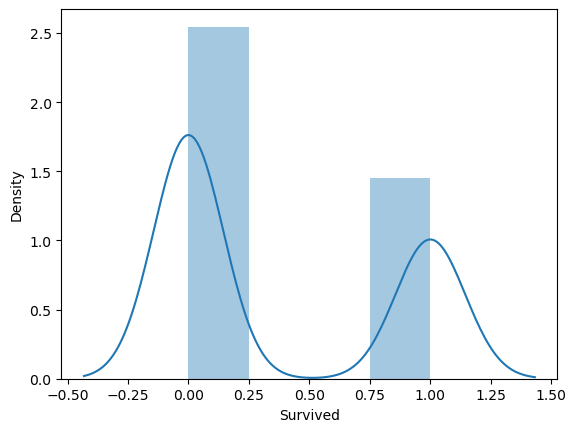

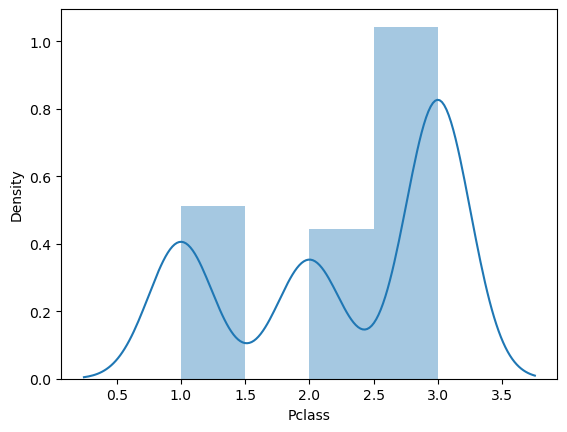

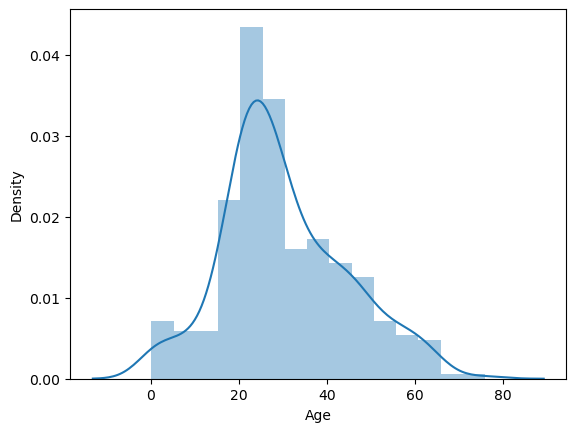

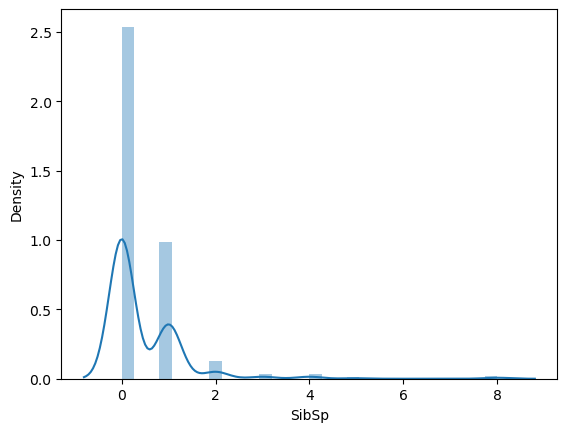

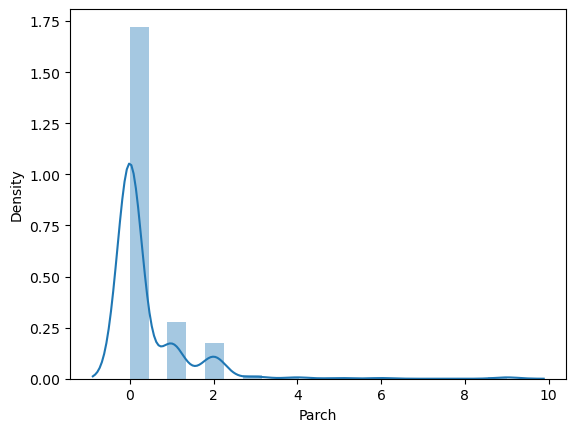

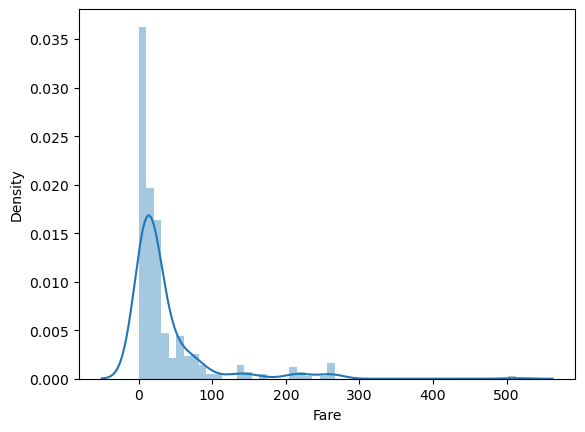

In [63]:
for i in num:
    sns.distplot(df[i])
    plt.show()

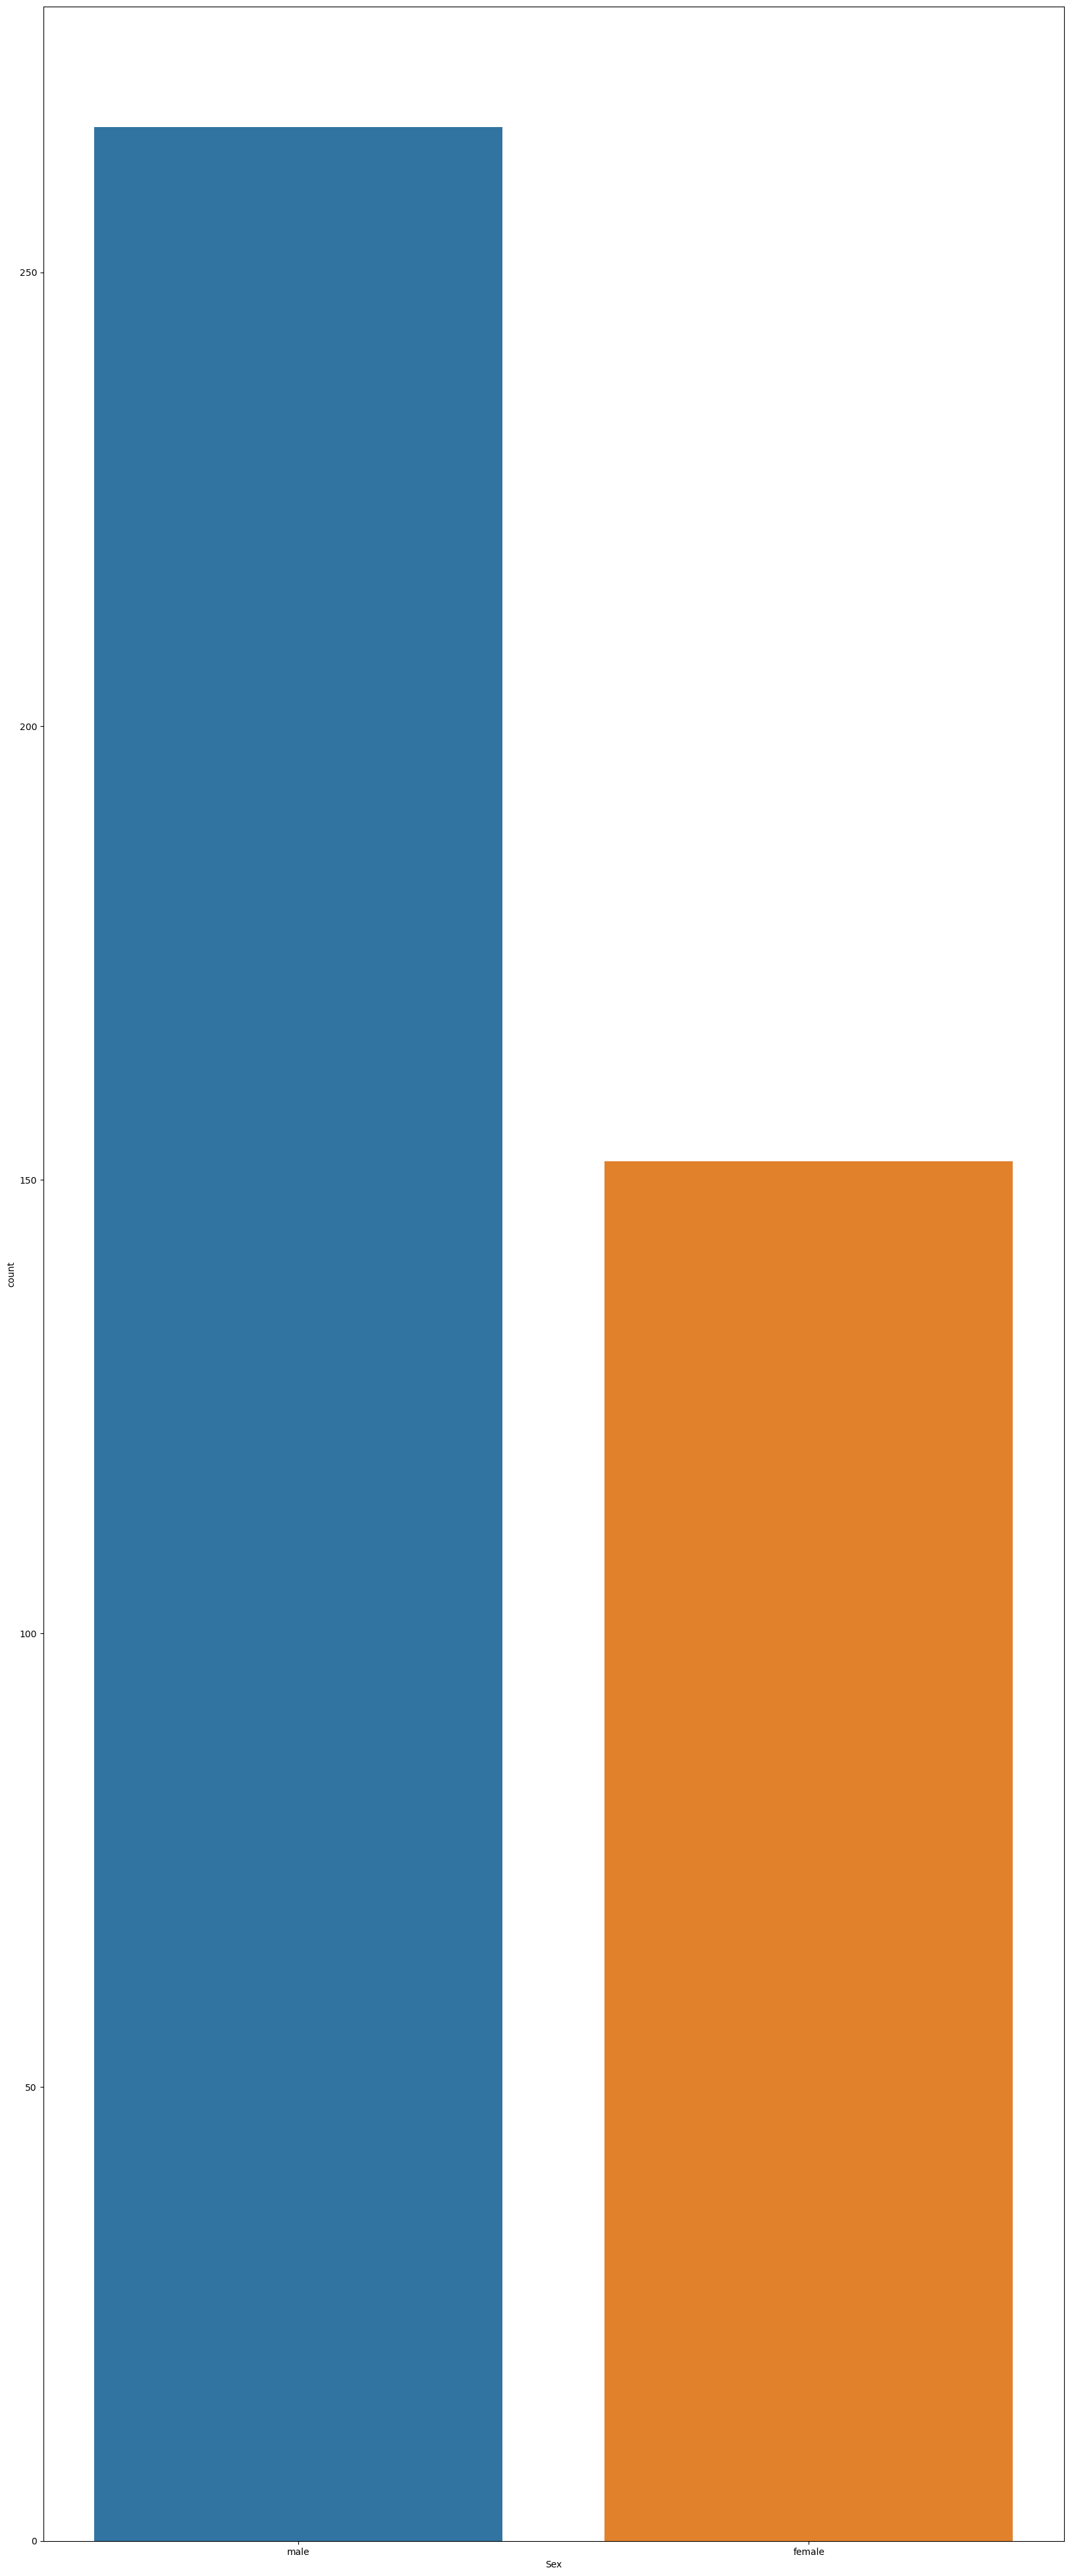

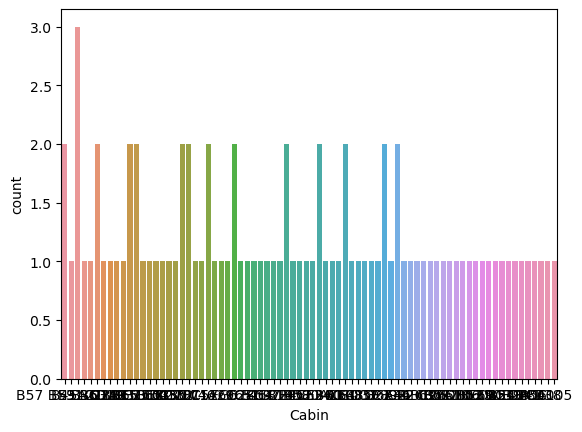

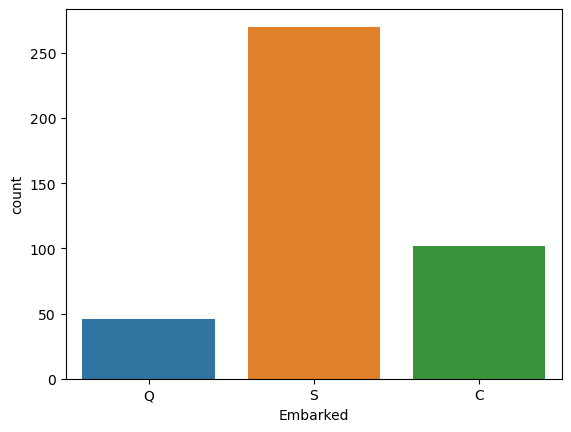

In [64]:
plt.figure(figsize=(20,50))
for i in cat:
    sns.countplot(x=df[i])
    plt.show()

# Outliers

<Axes: >

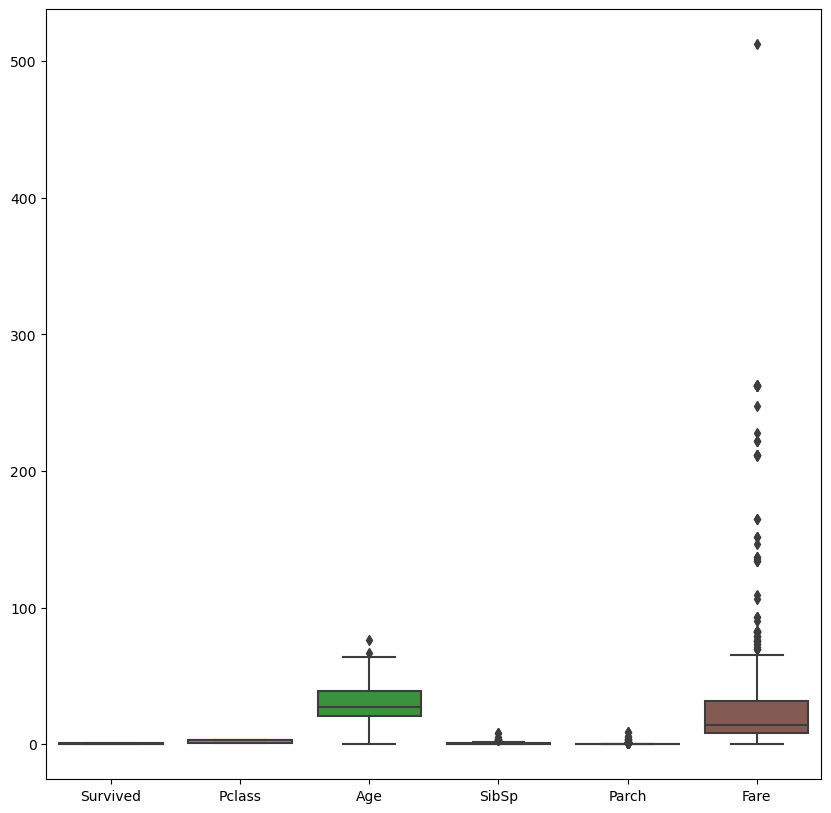

In [65]:
plt.figure(figsize=(10,10))
sns.boxplot(df)

In [66]:
def finding_outliers(data):
    outliers=[]
    data=sorted(data)
    
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    
    IQR=q3-q1
    
    ll=q1-(1.5*IQR)
    ul=q3+(1.5*IQR)
    
    for i in data:
        if (i<ll or i>ul):
            outliers.append(i)
    return outliers


for i in df[num]:
    outliers_list=finding_outliers(df[i])
    print('outliers in',i,'feature :',outliers_list)

outliers in Survived feature : []
outliers in Pclass feature : []
outliers in Age feature : []
outliers in SibSp feature : [3, 3, 3, 3, 4, 4, 4, 4, 5, 8, 8]
outliers in Parch feature : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 5, 6, 9, 9]
outliers in Fare feature : []


There are outliers present in the data set since the outliers are more in Sinsp and Parch column so we iam not going to treat the outliers

## Bivariant Analysis

## Numerical Vs Numerical

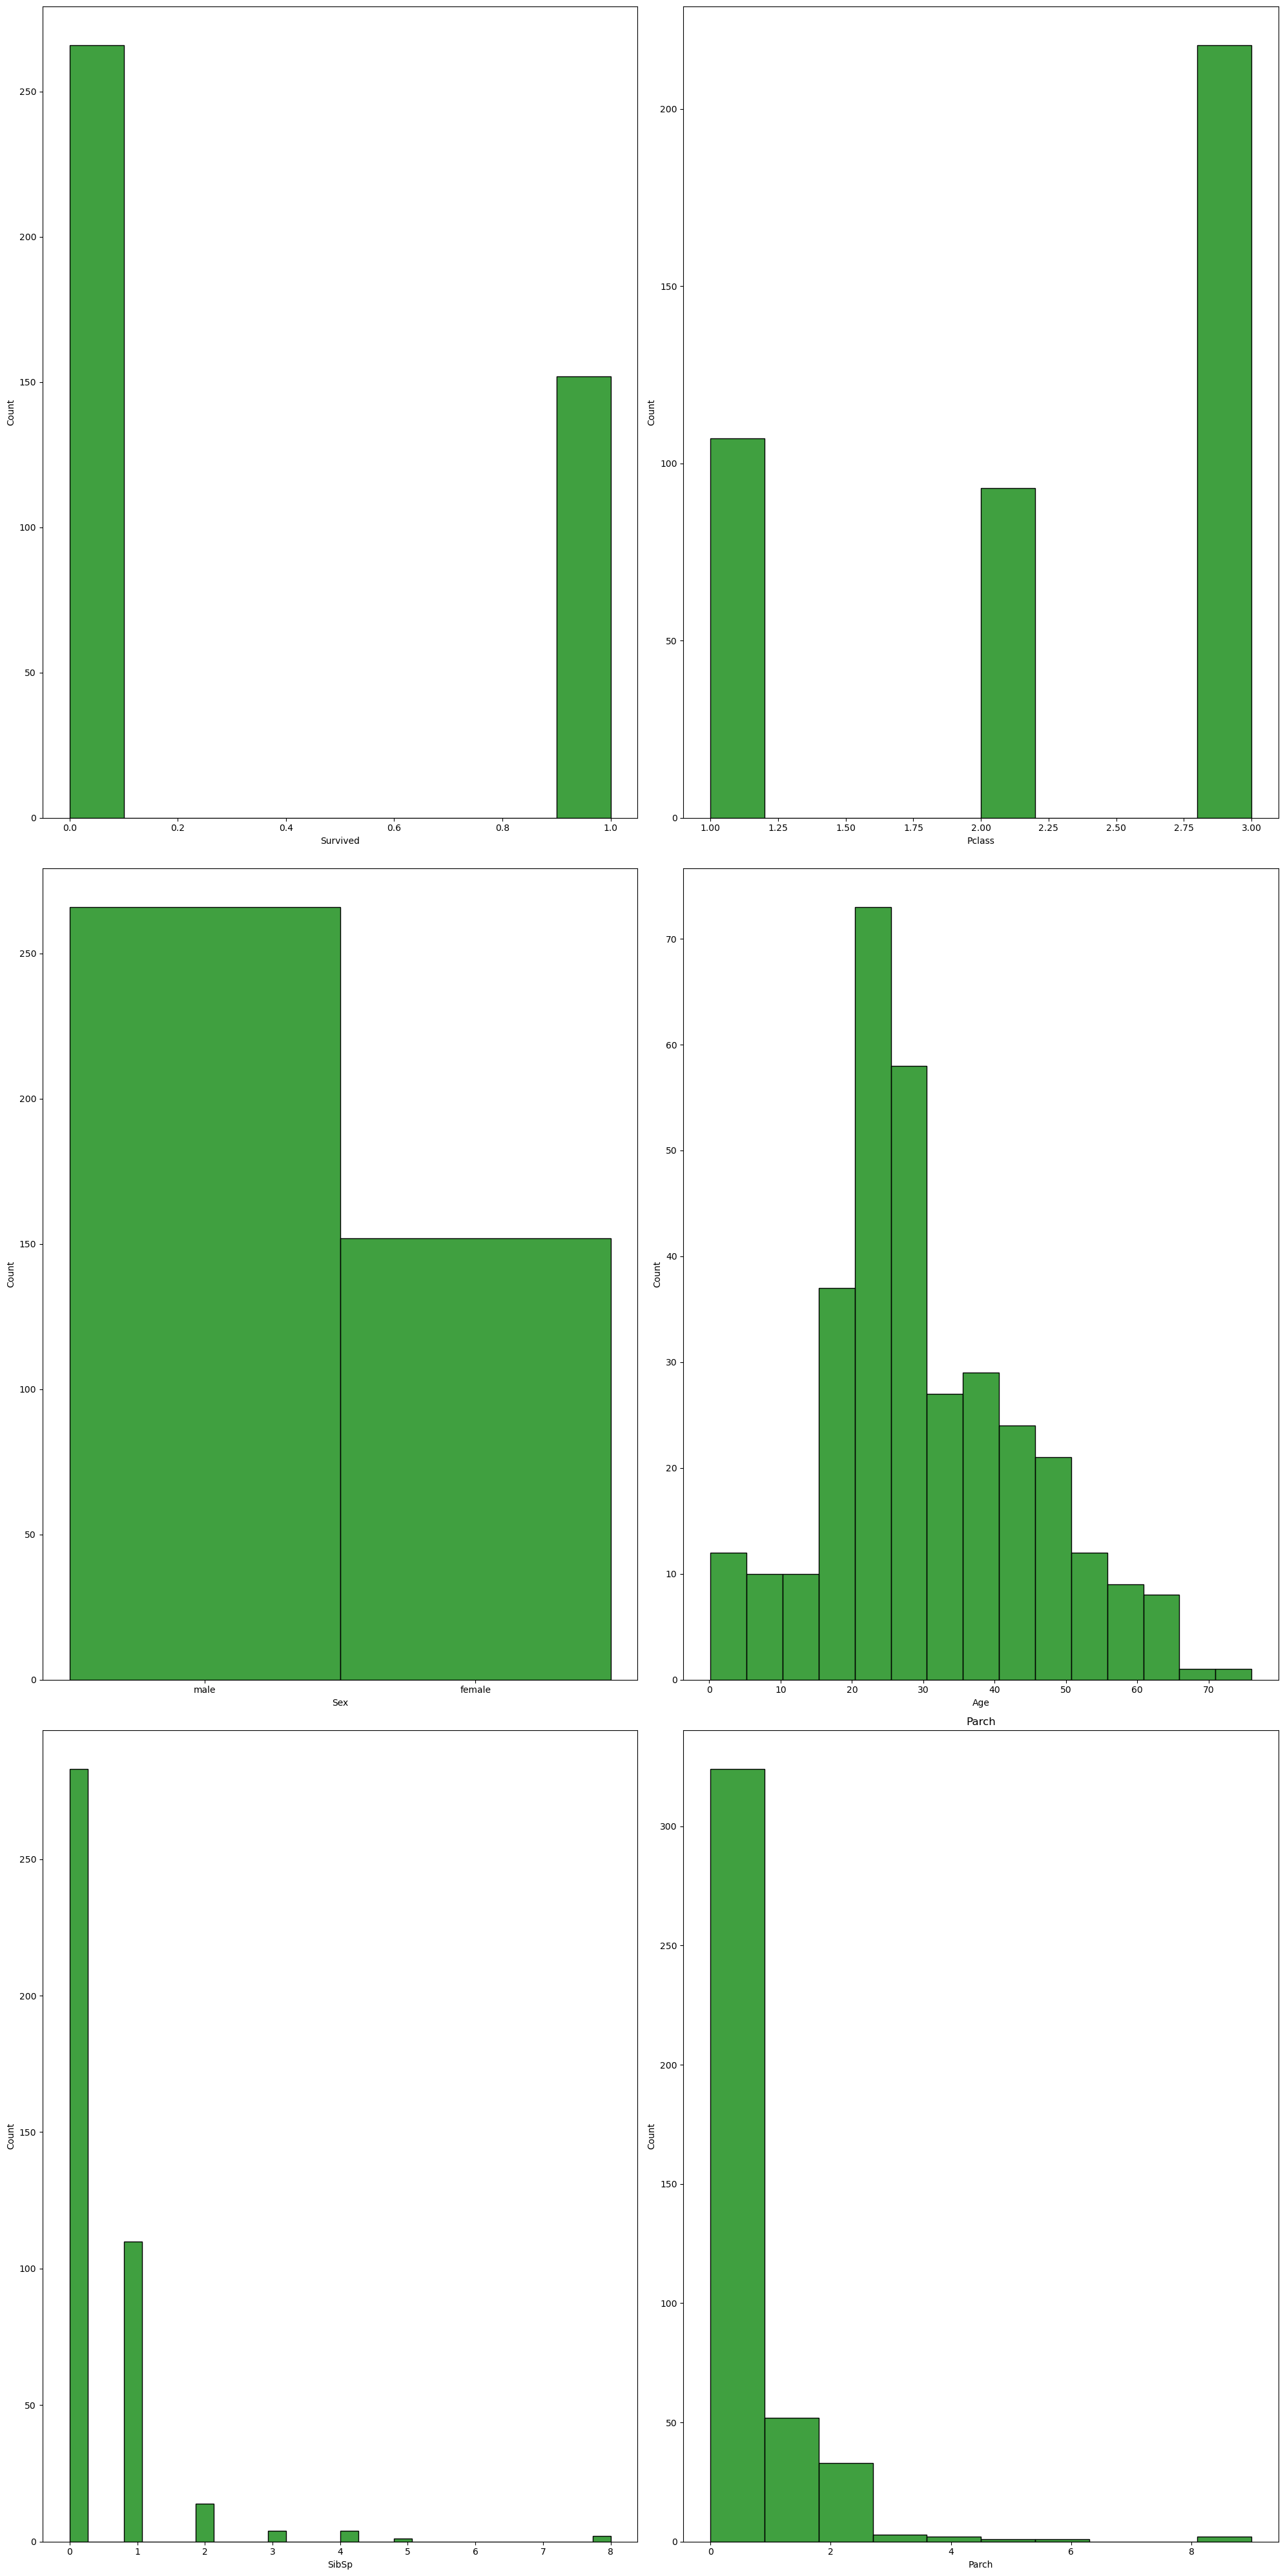

In [67]:
fig,ax=plt.subplots(3,2 , figsize=(20,40))

for i ,subplot in zip(df,ax.flatten()):
    sns.histplot(df[i],ax=subplot,color='green')
    plt.title(i)
plt.tight_layout()    
plt.show()

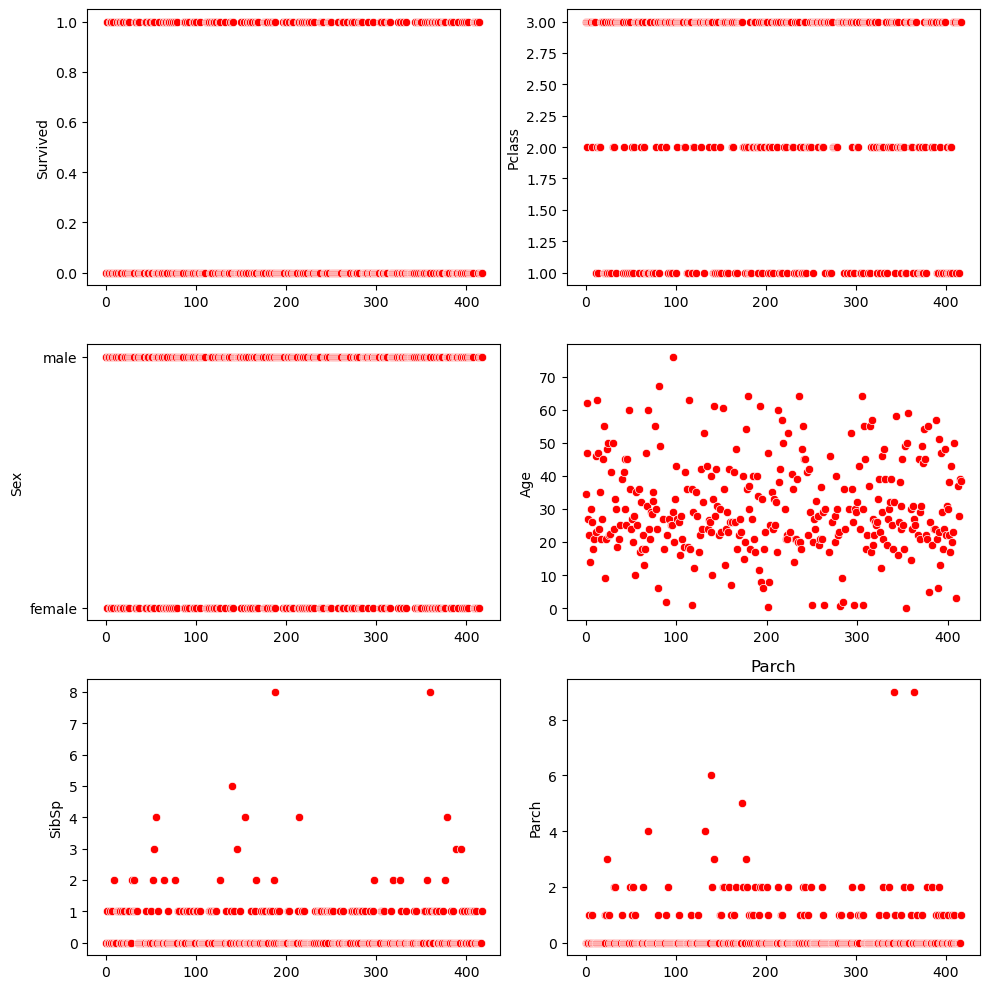

In [68]:
fig,ax=plt.subplots(3,2 , figsize=(10,10))

for i ,subplot in zip(df,ax.flatten()):
    sns.scatterplot(df[i],ax=subplot,color='red')
    plt.title(i)
plt.tight_layout()    
plt.show()

## Numerical Vs categorical

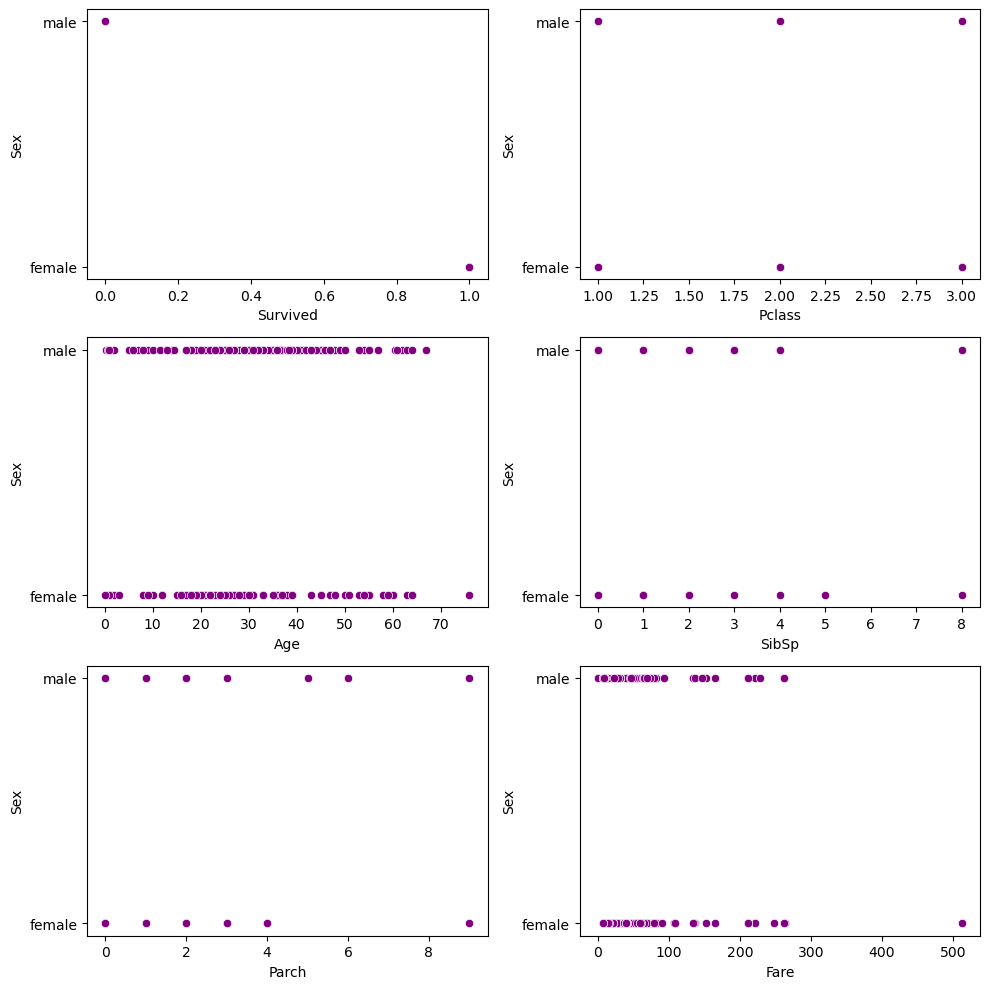

In [69]:
fig, ax= plt.subplots(3,2, figsize=(10,10))

for i, subplot in zip(num, ax.flatten()):
    sns.scatterplot(x=df[i],y=df.Sex, ax=subplot,color='purple')
    #plt.title('df[i]')

plt.tight_layout()
plt.show()

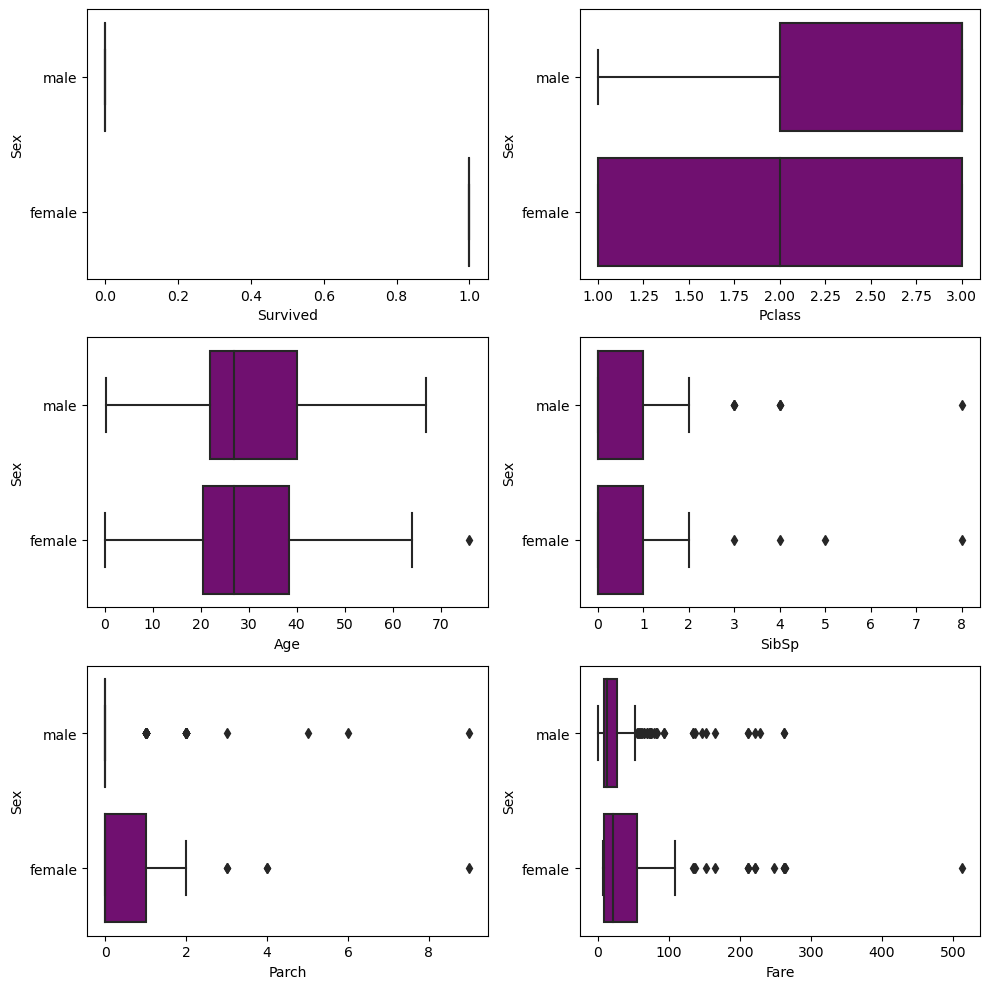

In [70]:
fig, ax= plt.subplots(3,2, figsize=(10,10))

for i, subplot in zip(num, ax.flatten()):
    sns.boxplot(x=df[i],y=df.Sex, ax=subplot,color='purple')
    #plt.title('df[i]')

plt.tight_layout()
plt.show()

In [71]:
def check_null(df):
    
    print('\n','-'*10,' Missing Values in the Dataset','-'*20)
    percent = pd.DataFrame(df.isnull().sum()/df.shape[0] * 100,columns=['Percent_Missing'])
    values  = pd.DataFrame(df.isnull().sum(),columns=['No_of_missing'])
    display(pd.concat([values,percent],axis = 1))
    
    
check_null(df)


 ----------  Missing Values in the Dataset --------------------


,No_of_missing,Percent_Missing
Survived,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
Age,86,20.574163
SibSp,0,0.000000
Parch,0,0.000000
Fare,1,0.239234
Cabin,327,78.229665
Embarked,0,0.000000


In [72]:
## there is missing values in the data set.

In [73]:
# Missing value Treatment

# we assume that the null values
df.Age.fillna(0,inplace = True)
df.Cabin.fillna(0,inplace = True)

In [74]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Cabin       0
Embarked    0
dtype: int64

## heatmap

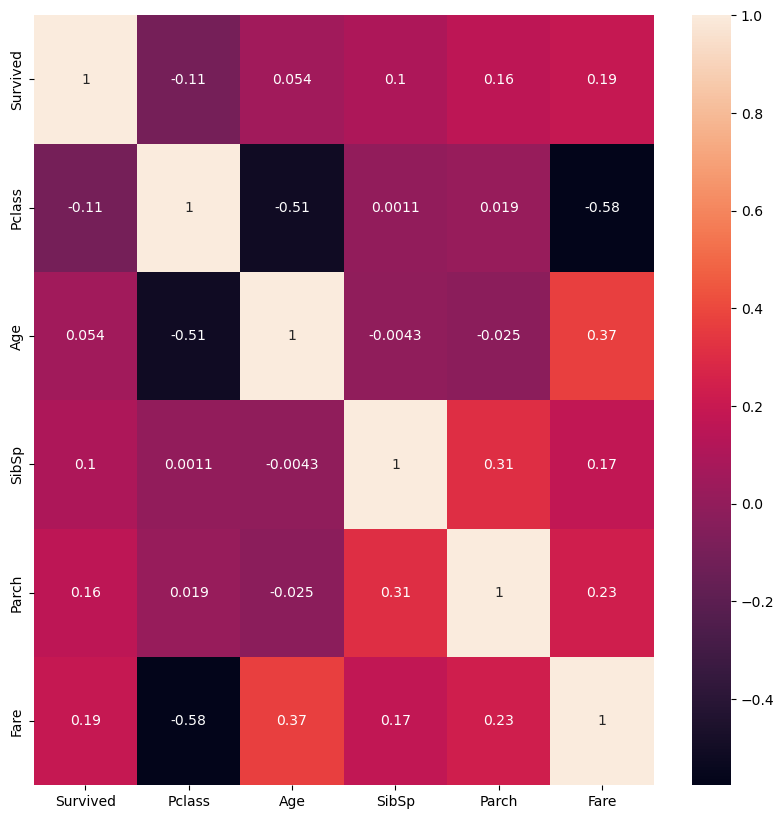

In [75]:
plt.figure(figsize=(10,10))
sns.heatmap(df[num].corr(),annot=True)
plt.show()

In [76]:
##There is slight multicollinearity between independend variable except Pclass and Fare variables

## Transform the Dataset

In [77]:
df[num].skew()

Survived    0.568991
Pclass     -0.534170
Age         0.246511
SibSp       4.168337
Parch       4.654462
Fare        3.687213
dtype: float64

In [78]:
df_out = ["SibSp","Parch","Fare"]

pt= PowerTransformer(method="yeo-johnson")

for i in df_out:
    df[i] = pt.fit_transform(df[[i]])

In [79]:
df[num].skew()

Survived    0.568991
Pclass     -0.534170
Age         0.246511
SibSp       0.773854
Parch       1.325151
Fare       -0.079442
dtype: float64

## Encoding

In [80]:
def uni(cat):
    for i in df[cat]:
        print(i,df[i].unique())

In [81]:
uni(cat)

Sex ['male' 'female']
Cabin [0 'B45' 'E31' 'B57 B59 B63 B66' 'B36' 'A21' 'C78' 'D34' 'D19' 'A9' 'D15'
 'C31' 'C23 C25 C27' 'F G63' 'B61' 'C53' 'D43' 'C130' 'C132' 'C101'
 'C55 C57' 'B71' 'C46' 'C116' 'F' 'A29' 'G6' 'C6' 'C28' 'C51' 'E46' 'C54'
 'C97' 'D22' 'B10' 'F4' 'E45' 'E52' 'D30' 'B58 B60' 'E34' 'C62 C64' 'A11'
 'B11' 'C80' 'F33' 'C85' 'D37' 'C86' 'D21' 'C89' 'F E46' 'A34' 'D' 'B26'
 'C22 C26' 'B69' 'C32' 'B78' 'F E57' 'F2' 'A18' 'C106' 'B51 B53 B55'
 'D10 D12' 'E60' 'E50' 'E39 E41' 'B52 B54 B56' 'C39' 'B24' 'D28' 'B41'
 'C7' 'D40' 'D38' 'C105']
Embarked ['Q' 'S' 'C']


In [82]:
df.Sex=df.Sex.replace({'male':0,'female':1})
df.Embarked=df.Embarked.replace({'Q':0,'S':1,'C':2})

In [83]:
# Encoding the job , marital education ,contact , month , poutcome 
df = pd.get_dummies(df,drop_first=True)

In [84]:
df=df.replace({False:0,True:1})

In [85]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_A11,Cabin_A18,...,Cabin_E52,Cabin_E60,Cabin_F,Cabin_F E46,Cabin_F E57,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6
0,0,3,0,34.5,-0.689261,-0.538447,-0.902443,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,1,47.0,1.392053,-0.538447,-1.041711,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,62.0,-0.689261,-0.538447,-0.643499,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,0,27.0,-0.689261,-0.538447,-0.778438,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,3,1,22.0,1.392053,1.806630,-0.364856,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,0,0.0,-0.689261,-0.538447,-0.868166,1,0,0,...,0,0,0,0,0,0,0,0,0,0
414,1,1,1,39.0,-0.689261,-0.538447,1.609205,2,0,0,...,0,0,0,0,0,0,0,0,0,0
415,0,3,0,38.5,-0.689261,-0.538447,-0.997840,1,0,0,...,0,0,0,0,0,0,0,0,0,0
416,0,3,0,0.0,-0.689261,-0.538447,-0.868166,1,0,0,...,0,0,0,0,0,0,0,0,0,0


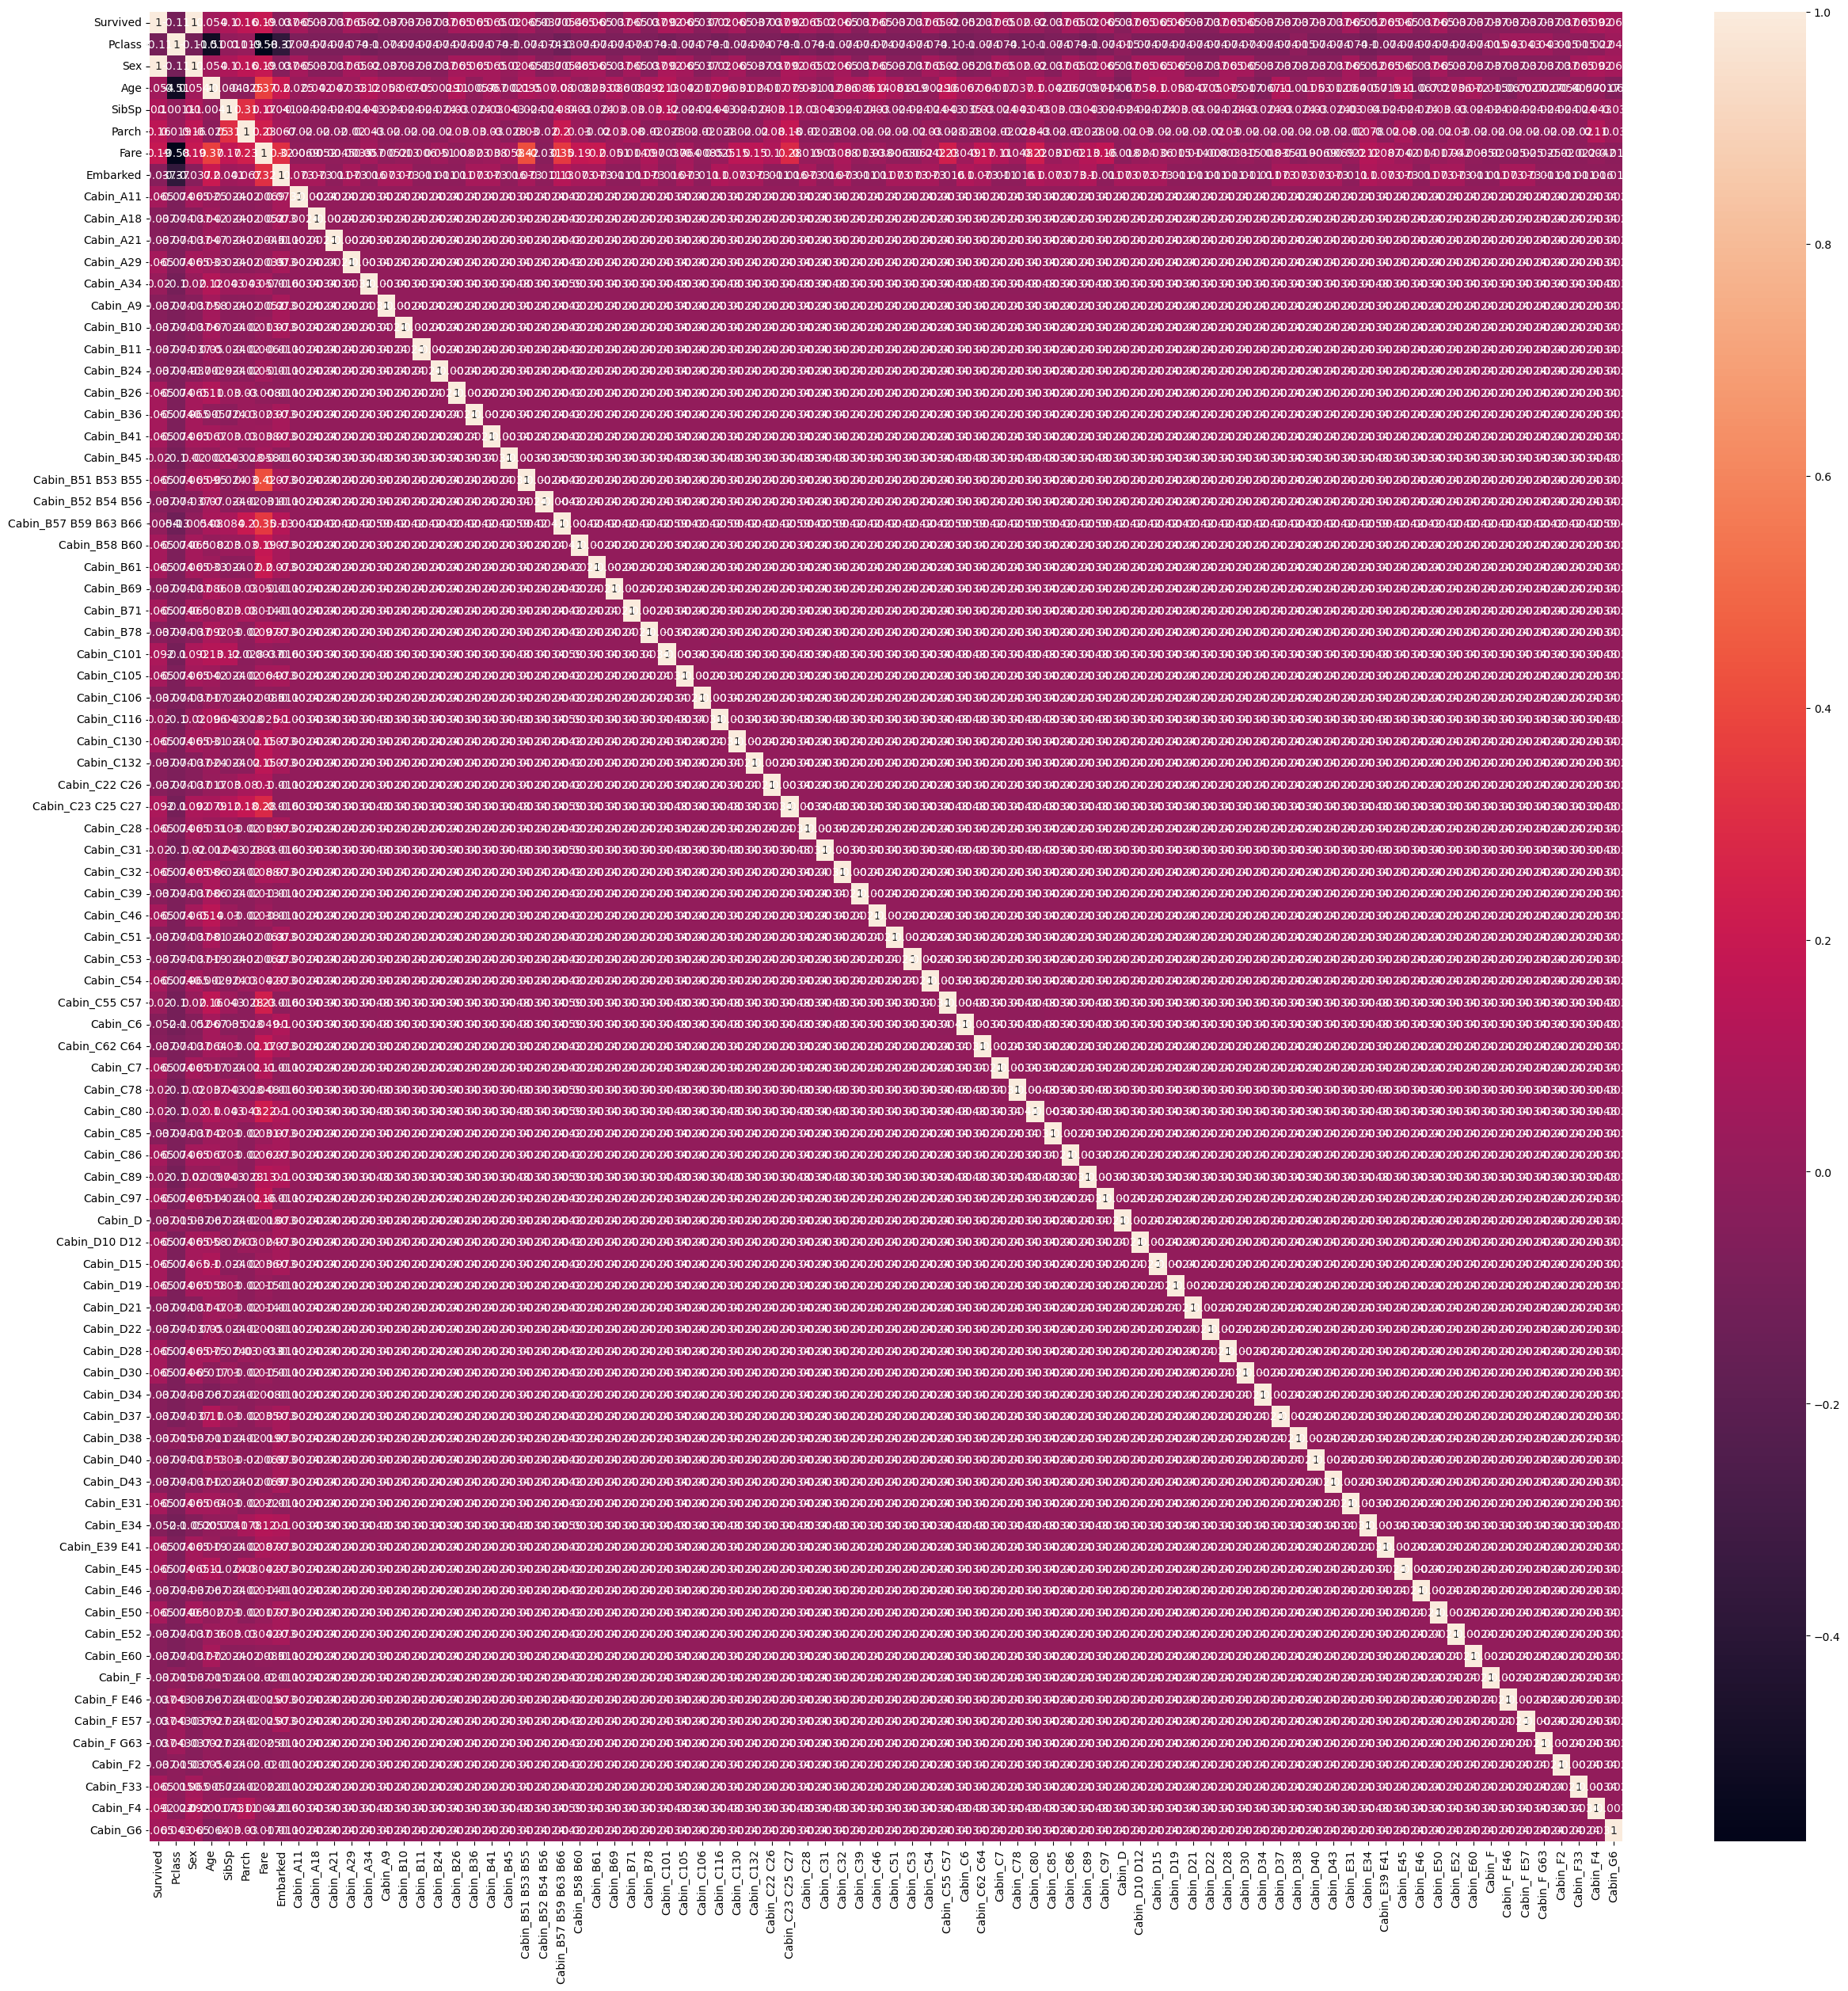

In [39]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)
plt.show()

## splitting

In [86]:
x = df.drop("Survived",axis=1)
y = df["Survived"]

In [87]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(334, 83) (334,) (84, 83) (84,)


## scaling

In [89]:
num

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [90]:
ss = StandardScaler()

df_scale = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

xtrain[i] = ss.fit_transform(xtrain[[i]])
xtest[i] = ss.transform(xtest[[i]])

In [91]:
xtrain

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_A11,Cabin_A18,Cabin_A21,...,Cabin_E52,Cabin_E60,Cabin_F,Cabin_F E46,Cabin_F E57,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6
337,3,0,39.0,-0.689261,1.912698,-0.967780,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
224,1,1,53.0,-0.689261,-0.538447,0.459025,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
376,3,1,22.0,1.638792,-0.538447,-0.753726,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
312,3,0,0.0,-0.689261,-0.538447,-0.911976,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
165,3,1,26.0,1.392053,1.806630,0.249749,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,3,0,0.0,-0.689261,-0.538447,-0.915913,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,3,1,29.0,-0.689261,-0.538447,-0.858359,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,3,0,24.0,-0.689261,-0.538447,-0.964339,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
235,3,0,20.0,-0.689261,-0.538447,-0.868985,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
xtest

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_A11,Cabin_A18,Cabin_A21,...,Cabin_E52,Cabin_E60,Cabin_F,Cabin_F E46,Cabin_F E57,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6
358,3,0,0.0,-0.689261,-0.538447,-0.884824,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164,2,0,41.0,-0.689261,-0.538447,-0.294958,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,3,0,21.0,-0.689261,-0.538447,-0.968476,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,1,0,47.0,-0.689261,-0.538447,0.841563,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1,22.0,1.392053,1.806630,-0.356711,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,1,0,46.0,-0.689261,-0.538447,1.322200,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
407,1,0,50.0,1.392053,1.806630,1.932787,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
325,3,0,23.0,-0.689261,-0.538447,-0.997896,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81,1,0,67.0,1.392053,-0.538447,1.958330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
xtrain.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_A11,Cabin_A18,Cabin_A21,...,Cabin_E52,Cabin_E60,Cabin_F,Cabin_F E46,Cabin_F E57,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6
count,334.000000,334.000000,334.000000,334.000000,334.000000,3.330000e+02,334.000000,334.000000,334.000000,334.000000,...,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.0,334.000000,334.000000,334.000000
mean,2.245509,0.377246,24.172156,-0.023404,-0.007039,3.067283e-17,1.152695,0.002994,0.002994,0.002994,...,0.002994,0.002994,0.002994,0.002994,0.002994,0.002994,0.0,0.002994,0.005988,0.002994
std,0.855767,0.485424,17.808127,0.993785,0.997924,1.001505e+00,0.583076,0.054718,0.054718,0.054718,...,0.054718,0.054718,0.054718,0.054718,0.054718,0.054718,0.0,0.054718,0.077266,0.054718
min,1.000000,0.000000,0.000000,-0.689261,-0.538447,-4.895675e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,1.000000,0.000000,9.000000,-0.689261,-0.538447,-8.652205e-01,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,3.000000,0.000000,24.000000,-0.689261,-0.538447,-1.805856e-01,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.392053,-0.538447,6.125536e-01,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,3.000000,1.000000,76.000000,1.754343,1.935475,2.357751e+00,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [94]:
xtest.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_A11,Cabin_A18,Cabin_A21,...,Cabin_E52,Cabin_E60,Cabin_F,Cabin_F E46,Cabin_F E57,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.0,84.0,84.0,...,84.0,84.0,84.0,84.0,84.0,84.0,84.000000,84.0,84.0,84.0
mean,2.345238,0.309524,23.535714,0.093057,0.027988,-0.032129,1.059524,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.011905,0.0,0.0,0.0
std,0.783782,0.465074,16.838314,1.030941,1.019677,0.785333,0.567200,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.109109,0.0,0.0,0.0
min,1.000000,0.000000,0.000000,-0.689261,-0.538447,-1.096760,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
25%,2.000000,0.000000,10.375000,-0.689261,-0.538447,-0.858359,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
50%,3.000000,0.000000,24.500000,-0.689261,-0.538447,-0.178898,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
75%,3.000000,1.000000,36.125000,1.392053,-0.538447,0.408546,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
max,3.000000,1.000000,67.000000,1.754343,1.934992,1.958330,2.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0
